# Principle Component Analysis

## 1. PCA analysis: prepare test data

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lin
import pandas as pd

%matplotlib notebook

In [18]:
## This dataset is used in many different website

Data = np.array([[2.5,2.4],[0.5,0.7],[2.2,2.9],[1.9,2.2],[3.1,3.0],[2.3,2.7],
                [2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])

In [76]:
dataset = pd.DataFrame(Data,columns=['feature_1','feature_2'])
dataset

,feature_1,feature_2
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


<IPython.core.display.Javascript object>


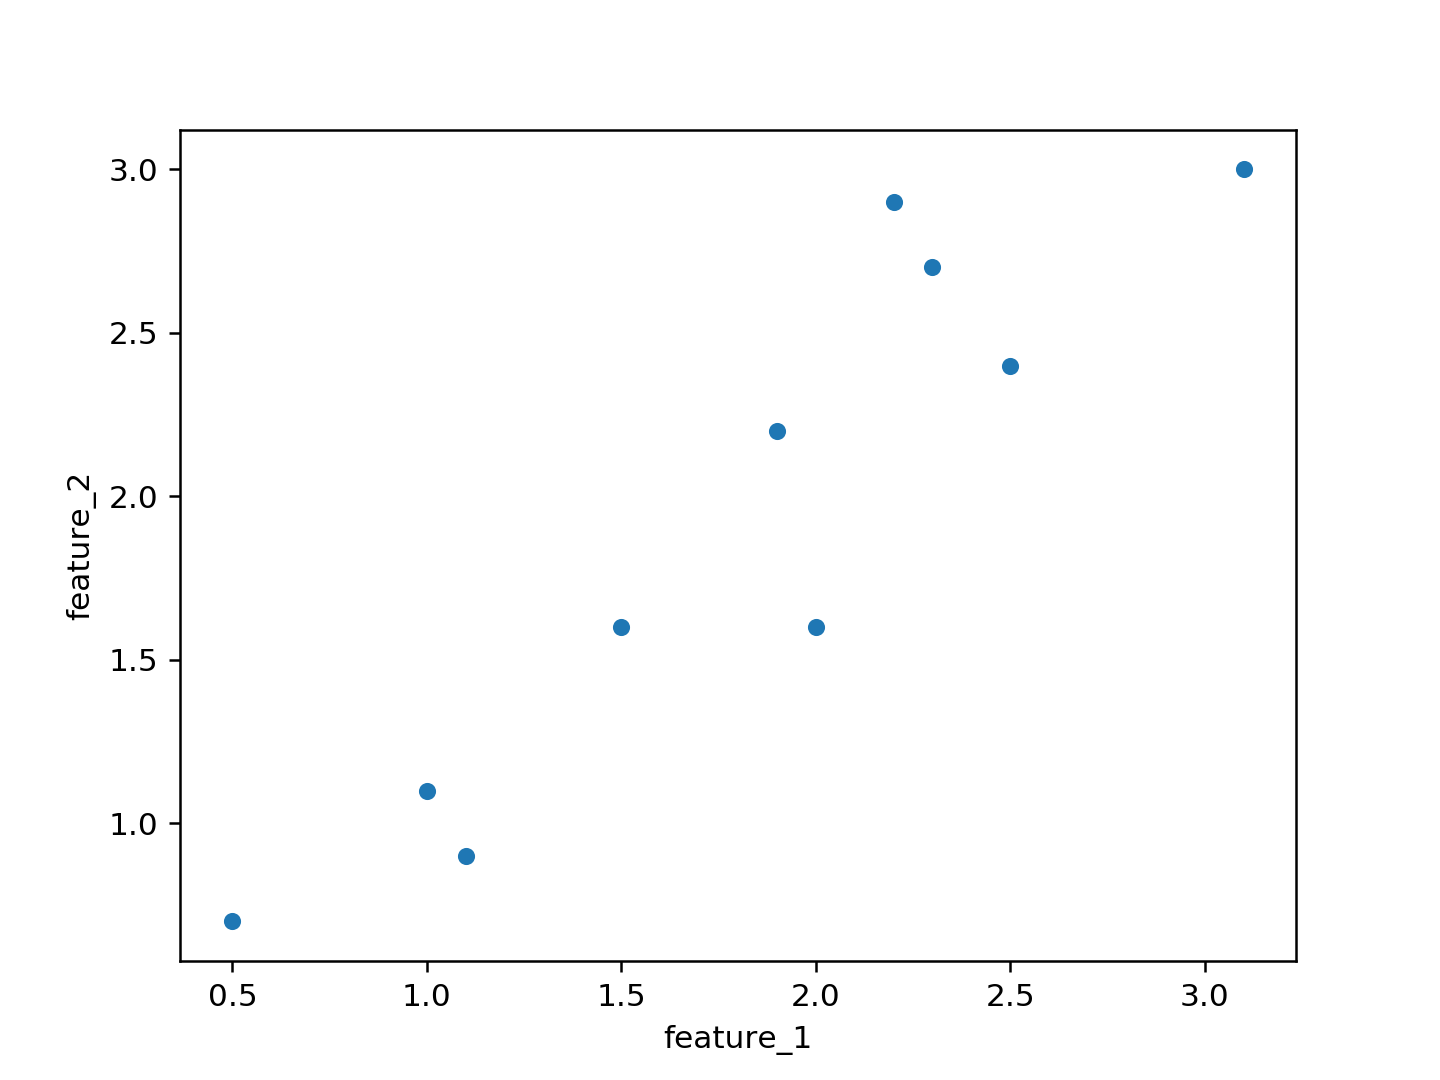

In [79]:
dataset.plot(x='feature_1',y='feature_2',kind='scatter')

#### The core steps to realize PCA:


1. Find the mean value of Data and normalize it according to different features
2. Calculate the Covariance matrix
3. Calculate the Eigenvalue and Eigenvector of Covariance matrix
4. Choose first K eigenvalue (sorted result) and (K<=N)
5. find the corrosponding eigenvectors
6. 


In [52]:
## implementation of PCA

class PCA:
    
    def __init__(self,dataset,var=False):
        """
        This is the constructor of this class. 
        
        The input file is a dataset, which has size (num_of_sample,num_of_feature)
        The function of this dataset is used to generate the matrix with normalized dataset, so
        that is: subtract every data by the mean value for a given feature, and then, divied by 
        the variance (if var==True)
        
        
        Input: dataset, size (num_of_sample,num_of_feature)
        
        Output: No, but initialize the attributes of this class.
        
        Attributes:
        1. self.num_of_sample: number of samples
        2. self.num_old_feature: number of features before pca
        3. self.num_new_feature: number of features after pca
        4. self.scaled_data: dataset after the normlization, size = (num_of_sample,num_of_feature)
        
        """
        self.num_of_sample = dataset.shape[0]
        self.num_old_feature = dataset.shape[1]
        self.num_new_feature = int(0) ## initialize it to zero
        
        self.scaled_data = dataset-np.mean(dataset,axis = 0)
        
        if var==True:
            variance = np.var(dataset,axis = 0)
            self.scaled_data = self.scaled_data/variance
        
        
    def _covariance(self, dataset):
        """
        This function calculate the covariance matrix.
        You do not need to do it by yourself. It will be called by other function
        
        Input: dataset, size = (num_of_sample,num_of_feature)
        
        Output: The covariance of the dataset, size = (num_of_feature,num_of_feature)
        """
        
        covar = np.cov(dataset.T)
        
        assert (covar.shape == (self.num_old_feature,self.num_old_feature))
        
        return covar
    
    
    def fit_pca(self,k):
        """
        This function will calculate the eigenvalue and eigenvector of the covariance matrix.
        And pick up the k topmost eigenvalues.
        
        
        Input: k,integer
        
        Output: final_data, numpy array, size = (num_of_samples,k)
        """
        if (k>self.num_old_feature):
            raise Exception("The k value must be less or equal to the number of features before pca")
            
        self.num_new_feature = k
            
        covar_matrix = self._covariance(self.scaled_data)    
            
        eigValue, eigVec=  lin.eig(covar_matrix)
        
        Argsort = np.argsort(eigValue)[::-1]
        
        Pick_k_vector = np.array([eigVec[:,Argsort[i]] for i in range(0,k)]).T
        
        final_data = np.dot(self.scaled_data,Pick_k_vector)
        return final_data
        
    def printf(self):
        """
        This is the function that summarize the result after pca
        """
        
        print ("-------------------------------Principle Component Analysis--------------------------------")
        print ('\n')
        print ("The dataset has {} number of samples(observations)".format(self.num_of_sample))
        print ("The number of features before PCA is: {}".format(self.num_old_feature))
        print ("The number of features after PCA is: {}".format(self.num_new_feature))
        

In [55]:
my = PCA(Data)
my.fit_pca(1)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

<IPython.core.display.Javascript object>


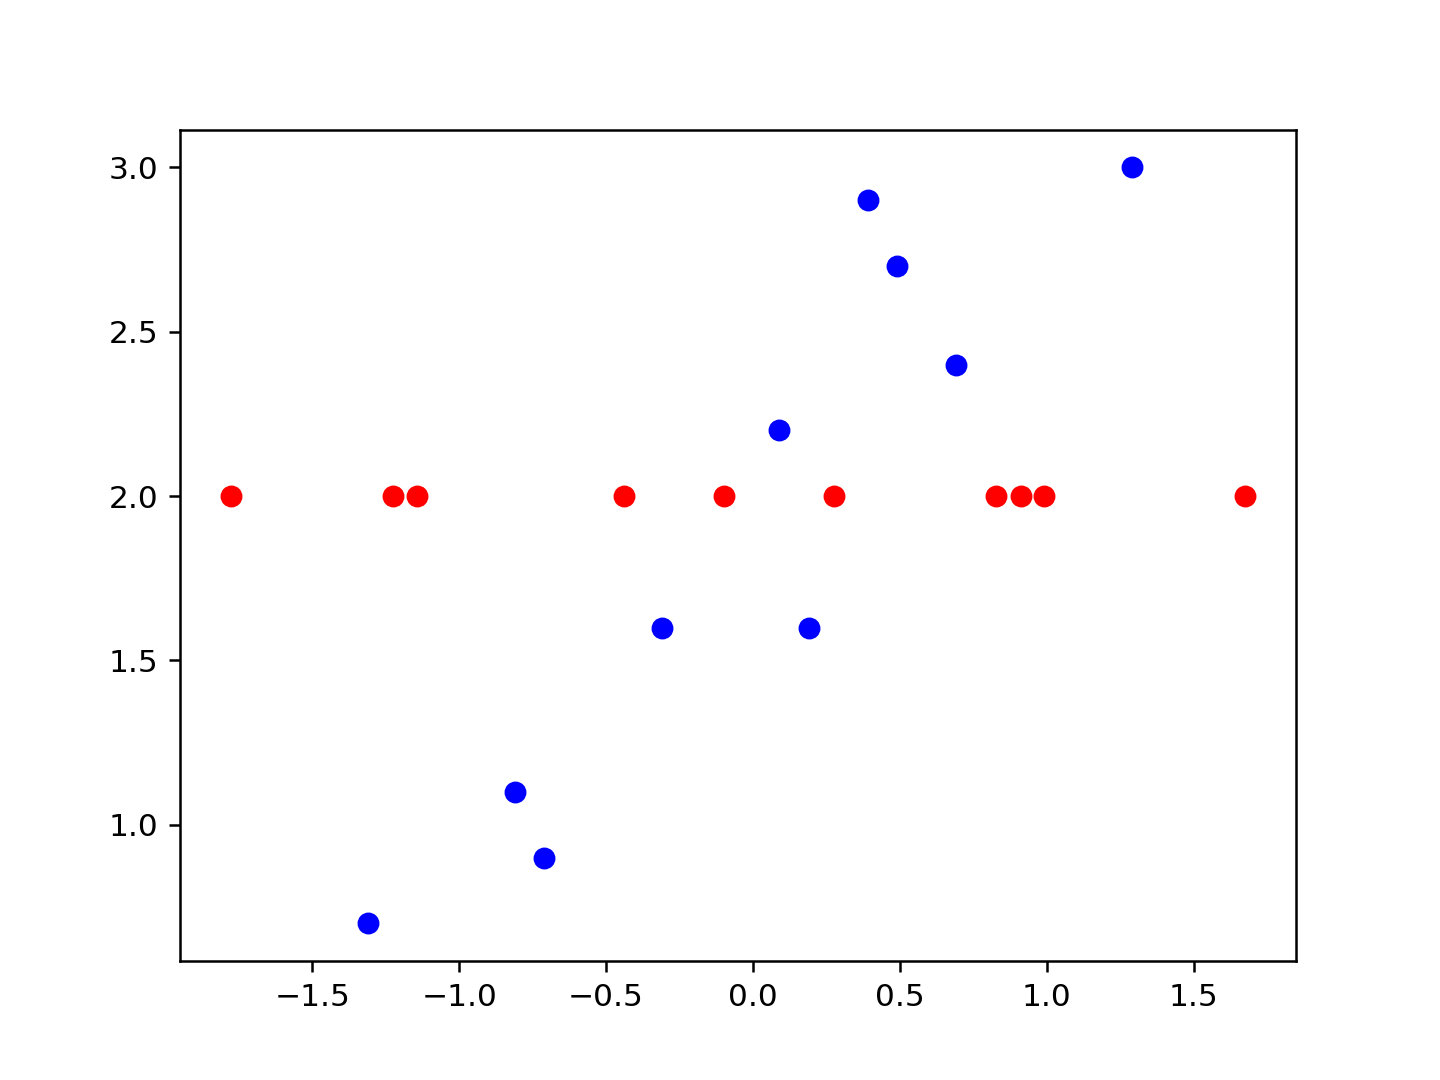

In [69]:
newdata = my.fit_pca(1)

plt.plot(-newdata[:,0],[2]*10,'ro')
plt.plot(my.scaled_data[:,0],Data[:,1],'bo')

# plt.ylim(-2,2)
plt.show()

In [70]:
my.printf()

-------------------------------Principle Component Analysis--------------------------------


The dataset has 10 number of samples(observations)
The number of features before PCA is: 2
The number of features after PCA is: 1
